# Dog breed classification
Dogs constantly go missing and in order to combat this issue, we aim to develop a computer vision model that will classify dog breeds. We hope this can help dogs return to their owners more easily.

In [17]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


cropped.zip is our dataset

In [2]:
!unzip cropped.zip

Archive:  cropped.zip
   creating: cropped/
  inflating: __MACOSX/._cropped      
   creating: cropped/Old-English-Sheepdog/
  inflating: __MACOSX/cropped/._Old-English-Sheepdog  
   creating: cropped/German-Shepherd/
  inflating: __MACOSX/cropped/._German-Shepherd  
   creating: cropped/Malamute/
  inflating: __MACOSX/cropped/._Malamute  
   creating: cropped/Shih-Tzu/
  inflating: __MACOSX/cropped/._Shih-Tzu  
   creating: cropped/Labrador-Retriever/
  inflating: __MACOSX/cropped/._Labrador-Retriever  
  inflating: cropped/Old-English-Sheepdog/n02105641_9319.jpg  
  inflating: __MACOSX/cropped/Old-English-Sheepdog/._n02105641_9319.jpg  
  inflating: cropped/Old-English-Sheepdog/n02105641_309.jpg  
  inflating: __MACOSX/cropped/Old-English-Sheepdog/._n02105641_309.jpg  
  inflating: cropped/Old-English-Sheepdog/n02105641_7650.jpg  
  inflating: __MACOSX/cropped/Old-English-Sheepdog/._n02105641_7650.jpg  
  inflating: cropped/Old-English-Sheepdog/n02105641_8359.jpg  
  inflating: __MAC

In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from keras.utils import load_img
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import seaborn as sns

Our dataset consists of 5 dog breeds (classes), and we converted the images to greyscale as color is not a good indicator of breed.

In [4]:
num_classes = 5

input_shape = (224, 224, 1) 

batch_size = 128

train_generator = tf.keras.utils.image_dataset_from_directory(
    'cropped',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale', 
    batch_size=batch_size,
    image_size=input_shape[:2],
    seed=512,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    shuffle=True
)

val_generator = tf.keras.utils.image_dataset_from_directory(
    'cropped',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=input_shape[:2],
    seed=512,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    shuffle=True
)

Found 884 files belonging to 5 classes.
Using 708 files for training.
Found 884 files belonging to 5 classes.
Using 176 files for validation.


80 10 10 split between training, validation, and test set

In [5]:
num_val_batches = tf.data.experimental.cardinality(val_generator)
test_generator = val_generator.take(num_val_batches // 2)
val_generator = val_generator.skip(num_val_batches // 2)

Our model is a custom CNN.

In [6]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),

    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax') # maybe try sigmoid/softmax
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

num_val_batches = int(tf.data.experimental.cardinality(val_generator))

num_train_batches = int(tf.data.experimental.cardinality(train_generator))


history = model.fit(
    train_generator,
    steps_per_epoch=num_train_batches,
    epochs=55,
    validation_data=val_generator,
    validation_steps=num_val_batches
)

# Save the model
model.save('dog_classification_model.h5')
model.save_weights('model_weights.h5')

Epoch 1/55
6/6 [==============================] - 17s 490ms/step - loss: 21.6282 - accuracy: 0.2090 - val_loss: 1.9610 - val_accuracy: 0.3542
Epoch 2/55
6/6 [==============================] - 1s 138ms/step - loss: 2.6487 - accuracy: 0.1907 - val_loss: 1.5050 - val_accuracy: 0.2708
Epoch 3/55
6/6 [==============================] - 1s 125ms/step - loss: 1.6663 - accuracy: 0.1992 - val_loss: 1.5721 - val_accuracy: 0.3542
Epoch 4/55
6/6 [==============================] - 1s 124ms/step - loss: 1.6116 - accuracy: 0.2331 - val_loss: 1.5952 - val_accuracy: 0.2292
Epoch 5/55
6/6 [==============================] - 1s 152ms/step - loss: 1.5933 - accuracy: 0.2458 - val_loss: 1.6066 - val_accuracy: 0.1875
Epoch 6/55
6/6 [==============================] - 2s 169ms/step - loss: 1.5810 - accuracy: 0.2853 - val_loss: 1.6217 - val_accuracy: 0.2083
Epoch 7/55
6/6 [==============================] - 1s 129ms/step - loss: 1.5718 - accuracy: 0.2797 - val_loss: 1.6124 - val_accuracy: 0.2708
Epoch 8/55
6/6 [==

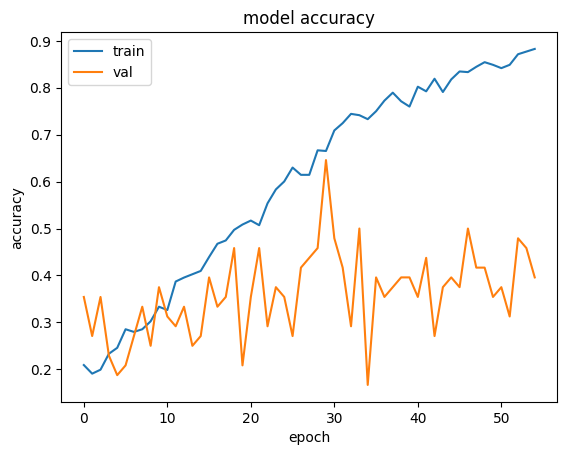

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

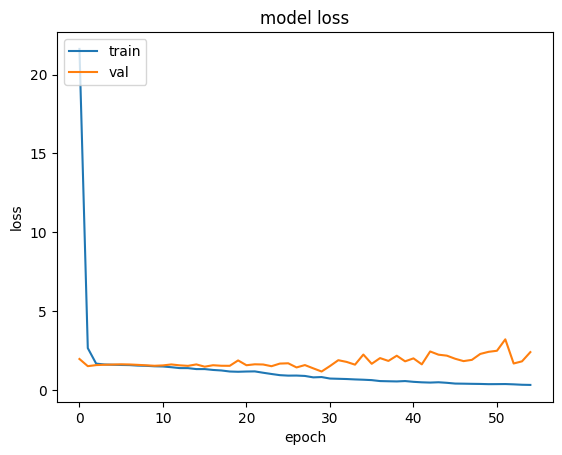

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Obtain predictions for validation set

In [10]:
y_pred_val = []  
y_true_val = []  

for image_batch, label_batch in val_generator:   
  
   y_true_val.append(np.argmax(label_batch, axis = - 1))

   preds = model.predict_on_batch(image_batch)

   y_pred_val.append(np.argmax(preds, axis = - 1))

y_pred_val = np.array(np.concatenate(y_pred_val, axis=0))
y_true_val = np.array(np.concatenate(y_true_val, axis=0))

Obtain metrics for validation set

In [11]:
print('Classification Report for Validation')
print(classification_report(y_true_val, y_pred_val))

Classification Report for Validation
              precision    recall  f1-score   support

           0       0.27      0.67      0.38         6
           1       0.50      0.21      0.30        14
           2       0.50      0.33      0.40        12
           3       0.33      0.60      0.43         5
           4       0.50      0.45      0.48        11

    accuracy                           0.40        48
   macro avg       0.42      0.45      0.40        48
weighted avg       0.45      0.40      0.39        48



Obtain predictions for test set

In [12]:
y_pred_test = []  
y_true_test = []  

for image_batch, label_batch in test_generator:   
   y_true_test.append(np.argmax(label_batch, axis = - 1))
  
   preds = model.predict_on_batch(image_batch)
   
   y_pred_test.append(np.argmax(preds, axis = - 1))

y_pred_test = np.array(np.concatenate(y_pred_test, axis=0))
y_true_test = np.array(np.concatenate(y_true_test, axis=0))

In [16]:
print(test_generator)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>


Obtain metrics for test set

In [13]:
print('Classification Report for Testing')
print(classification_report(y_true_test, y_pred_test))

Classification Report for Testing
              precision    recall  f1-score   support

           0       0.30      0.40      0.34        15
           1       0.36      0.32      0.34        28
           2       0.41      0.34      0.37        32
           3       0.29      0.42      0.34        24
           4       0.55      0.41      0.47        29

    accuracy                           0.38       128
   macro avg       0.38      0.38      0.37       128
weighted avg       0.39      0.38      0.38       128



visuals for confusion matrix

<Axes: >

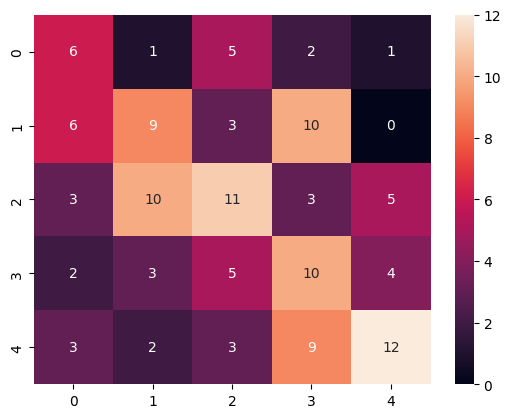

In [14]:
cf_matrix = confusion_matrix(y_true_test, y_pred_test)
sns.heatmap(cf_matrix, annot=True)